In [1]:
%matplotlib inline
import sys
sys.path.append('path_to_plantcv')
# Modify plantcv_directory to the directory where PlantCV is installed (e.g. /home/jdoe/plantcv/)
from matplotlib import pyplot as plt
import plantcv as pcv
import cv2
import numpy as np
from plantcv.dev.color_palette import color_palette
from math import sqrt

/Users/mgehan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Set variables
device = 0
debug = 'plot'
vis_img = './top-view-seeds.jpg'
# Modify image_file to the directory and file for an image to be processed (e.g. /home/jdoe/seed_images/seed_image1.jpg)

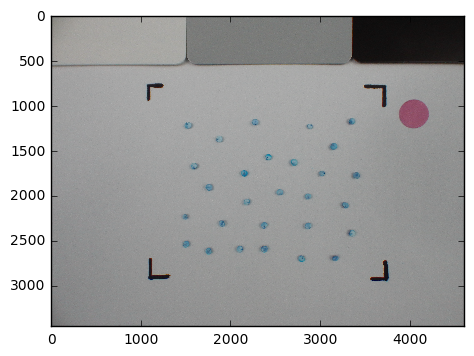

In [3]:
# Reads image 
img, path, filename = pcv.readimage(vis_img)
plt.imshow(img)
plt.show()

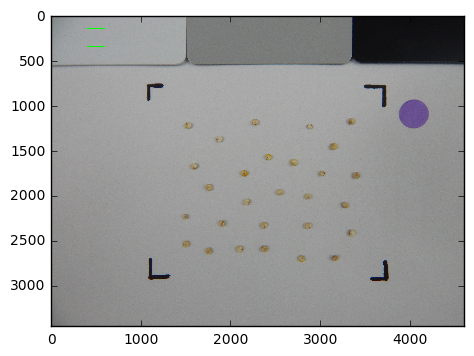

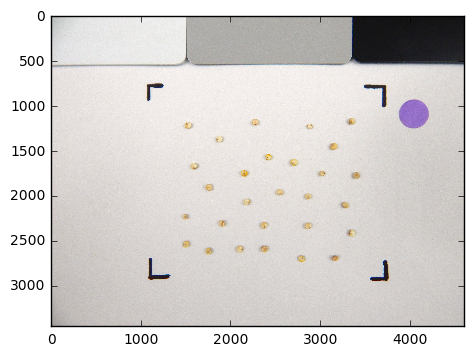

In [4]:
# White balance image based on white card
device,img1=pcv.white_balance(device,img,debug,(400,150,200,200))
# Modify the 4 coordinates in parenthesis to frame a white part of the image

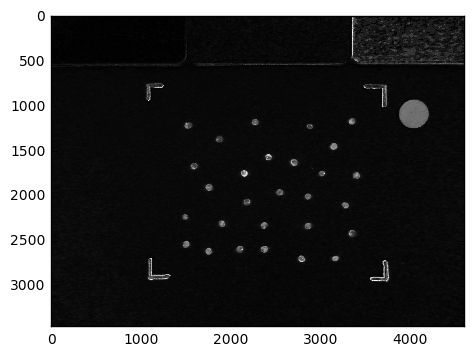

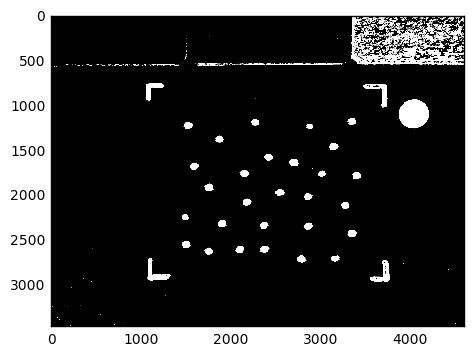

In [5]:
# Converts RGB to HSV and thresholds
device, l = pcv.rgb2gray_hsv(img1, 's', device, debug)
# Selects the S channel. Can be modified to select the H or V channel.
device, l_thresh = pcv.binary_threshold(l, 24, 255, 'light', device, debug)
# Thresholds based on a value 24. Modify the number 24 to a value between 1 and 254 to threshold seeds from background.

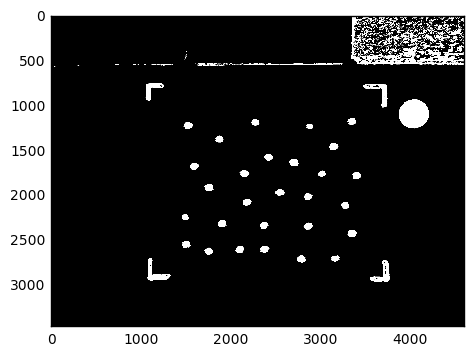

In [6]:
# Modify the number to fill in noise.
l_cnt=np.copy(l_thresh)
device, l_cnt1=pcv.fill(l_thresh,l_cnt,150,device, debug)


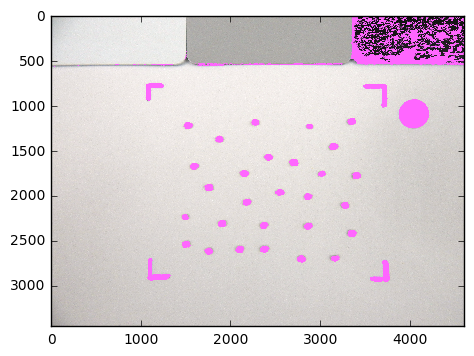

In [7]:
# Identifies objects
device, id_objects,obj_hierarchy = pcv.find_objects(img1, l_cnt1, device, debug)

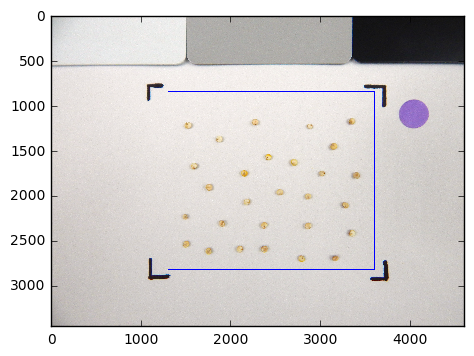

In [8]:
# Defines rectangular region of interest (ROI)
device, roi1, roi_hierarchy= pcv.define_roi(img1,'rectangle', device, None, 'default', debug,True, 1300, 850,-1000,-620)
# Modify the 4 coordinates in parenthesis to frame the image area where the seeds are

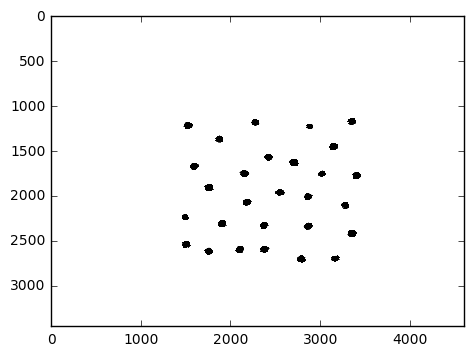

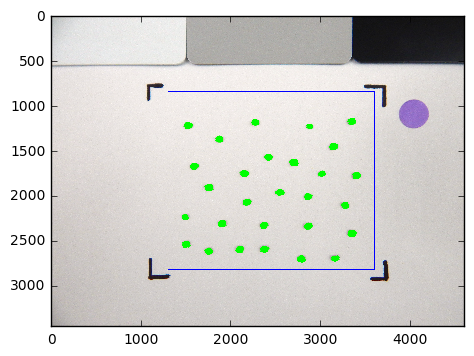

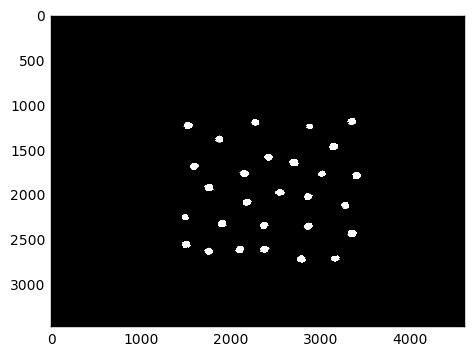

In [9]:
# Keeps only objects within or partially within ROI
device, roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img1, 'partial', roi1, roi_hierarchy,
                                                                           id_objects, obj_hierarchy, device,
                                                                           debug)

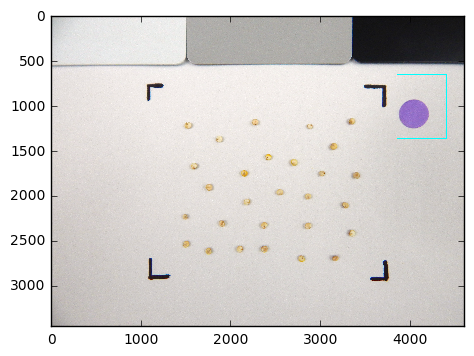

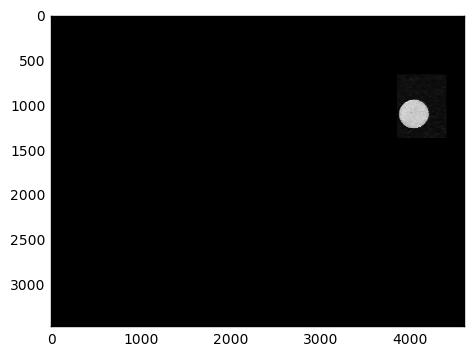

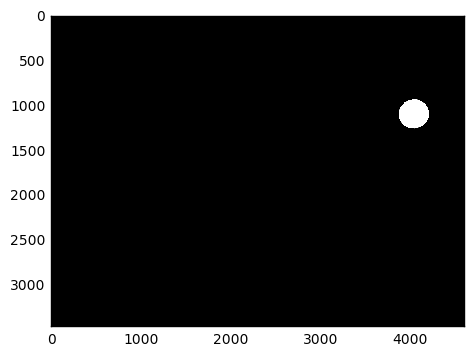

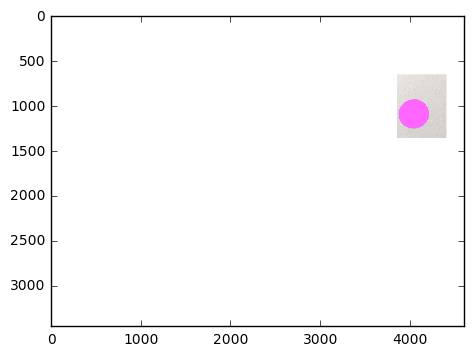

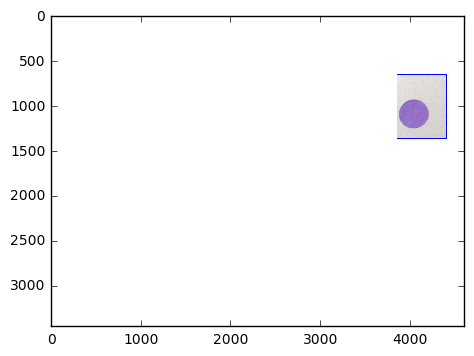

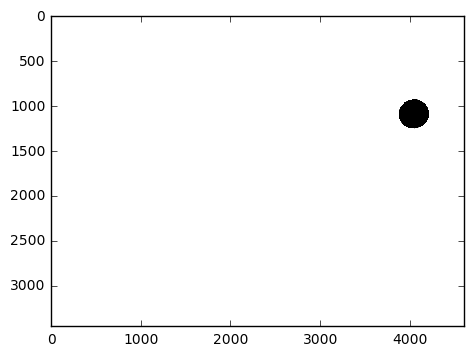

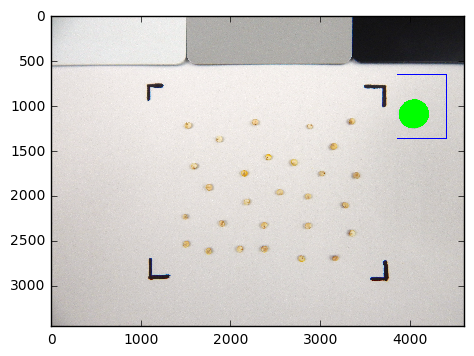

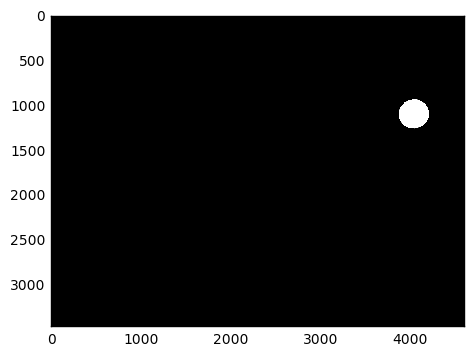

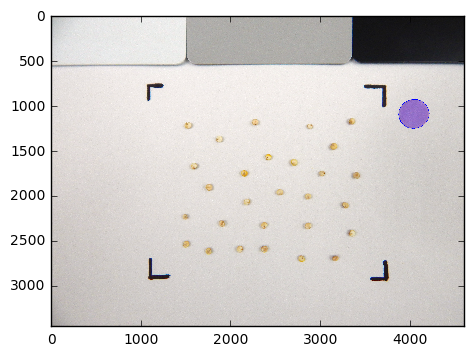

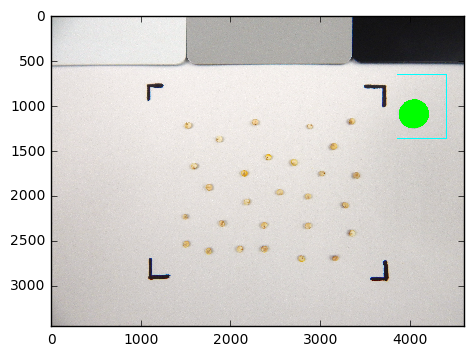

In [10]:
# Finds the area of the size marker in pixels and saves to "marker data"
device, marker_header,marker_data,images=pcv.report_size_marker_area(img1, 'rectangle', device, debug='plot', marker='detect', x_adj=3850, 
                                                                     y_adj=660, w_adj=-200, h_adj=-2080, base='white', objcolor='light', 
                                                                     thresh_channel='s', thresh=24, filename=False)
# Modify the 4 coordinates x_adj,y_adj, w_adj and h_adj to frame the image area where the size marker is.
# Thresholds based on a value 24. Modify the number 24 to a value between 1 and 254 to threshold size marker from background.

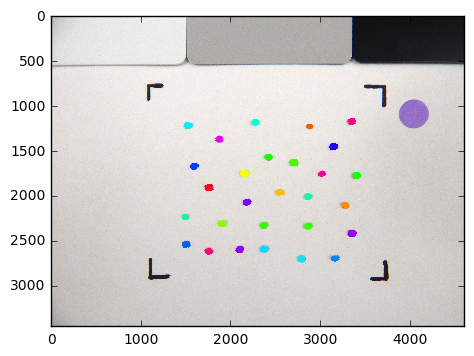

In [15]:
# STEP 11: Randomly color the individual seeds
img_copy = np.copy(img1)
for i in range(0, len(roi_objects)):
    rand_color = color_palette(1)
    cv2.drawContours(img_copy, roi_objects, i, rand_color[0], -1, lineType=8, hierarchy=roi_obj_hierarchy)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.show()


In [12]:
# Get and print the area of each seed
shape_header = []
table = []
for i in range(0, len(roi_objects)):
    if roi_obj_hierarchy[0][i][3] == -1: #Checks if shape is a parent contour
        
        # Object combine kept objects
        device, obj, mask2 = pcv.object_composition(img1, [roi_objects[i]], np.array([[roi_obj_hierarchy[0][i]]]), 
                                               device, 'None')
        if obj is not None:
            device, shape_header, shape_data, shape_img = pcv.analyze_object(img1, vis_img, obj, mask2, device, 'None')
            if shape_data is not None:
                table.append(shape_data)
        print(table)

[]
[['SHAPES_DATA', 5.0, 2.0, 2.5, 6.2426406145095825, 3, 3, 3, 3134.2, 2737.0, 4, True, 3134.025390625, 2737.484375, 2.838815689086914, 2.1081392765045166, 177.00225830078125, 0.66972163000041351]]
[['SHAPES_DATA', 5.0, 2.0, 2.5, 6.2426406145095825, 3, 3, 3, 3134.2, 2737.0, 4, True, 3134.025390625, 2737.484375, 2.838815689086914, 2.1081392765045166, 177.00225830078125, 0.66972163000041351]]
[['SHAPES_DATA', 5.0, 2.0, 2.5, 6.2426406145095825, 3, 3, 3, 3134.2, 2737.0, 4, True, 3134.025390625, 2737.484375, 2.838815689086914, 2.1081392765045166, 177.00225830078125, 0.66972163000041351], ['SHAPES_DATA', 6.0, 2.5, 2.4, 8.242640614509583, 2, 4, 2, 3114.3333333333335, 2701.3333333333335, 4, True, 3114.5, 2701.28564453125, 1.608142614364624, 1.27689790725708, 180.0, 0.60789122164937759]]
[['SHAPES_DATA', 5.0, 2.0, 2.5, 6.2426406145095825, 3, 3, 3, 3134.2, 2737.0, 4, True, 3134.025390625, 2737.484375, 2.838815689086914, 2.1081392765045166, 177.00225830078125, 0.66972163000041351], ['SHAPES_DATA

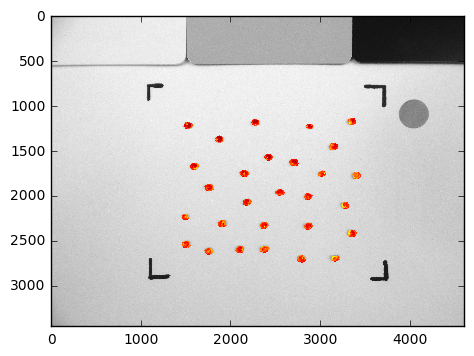

HEADER_HISTOGRAM	bin-number	bin-values	blue	green	red	lightness	green-magenta	blue-yellow	hue	saturation	value
HISTOGRAM_DATA	256	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,

In [13]:
#Analyze seed color
device, color_header, color_data, color_analysis= pcv.analyze_color(img1, vis_img, kept_mask, 256, device, "plot", None, 'v', 'img', 300, filename=False)

# Print color data
pcv.print_results(img1, color_header, color_data)